In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
def isNaN(string):
    return string!=string

In [3]:
!pwd

/Users/Trevor1/Desktop/git/VLA2022


In [4]:
dat = pd.read_csv("VLA2018data/grdr7_Shen2011_8403col_lofar_first_vlass_info.csv")
z   = dat["REDSHIFT"].values ; zmask = ((z>1.65)&(z<1.75))
dat = dat[zmask]

In [5]:
dat.shape

(2216, 36)

In [6]:
dat

col1                     Name      RA_1_1    Dec_1_1  \
10    2006  SDSSJ142509.13-022717.0  216.288070  -2.454726   
15    3691  SDSSJ095449.38+372634.2  148.705764  37.442858   
18    7077  SDSSJ123624.63+211224.4  189.102655  21.206803   
21     300  SDSSJ020357.97+140745.9   30.991545  14.129431   
22    7897  SDSSJ032125.79+001359.3   50.357484   0.233149   
...    ...                      ...         ...        ...   
8380  4405  SDSSJ130228.87+143257.0  195.620301  14.549192   
8389  8086  SDSSJ013146.43-084104.1   22.943495  -8.684493   
8390   750  SDSSJ135527.98+015527.5  208.866585   1.924316   
8394  6063  SDSSJ081413.31+164233.1  123.555496  16.709215   
8396  1877  SDSSJ074412.05+295906.8  116.050221  29.985228   

               SDSS_NAME        RA_2      DEC_2  REDSHIFT  TARGET_FLAG_TARGET  \
10    142509.13-022717.0  216.288071  -2.454726    1.6915                10.0   
15    095449.38+372634.2  148.705765  37.442860    1.7134           1048579.0   
18    123624.63+211224.4  189.102661  21.206802    1.7204           1048578.0   
21    020357.97+140745.9   30.991545  14.129431    1.6532           1179652.0   
22    032125.79+001359.3   50.357483   0.233149    1.7097           1048580.0   
...                  ...         ...        ...       ...                 ...   
8380  130228.87+143257.0  195.620300  14.549192    1.7384           3145739.0   
8389  013146.43-084104.1   22.943495  -8.684493    1.6512           3145748.0   
8390  135527.98+015527.5  208.866592   1.924316    1.7329              7700.0   
8394  081413.31+164233.1  123.555496  16.709215    1.7315           1048586.0   
8396  074412.05+295906.8  116.050224  29.985228    1.7070                11.0   

      UNIFORM_TARGET  ...  e_Sint  Separation_1a          RA        DEC  \
10               1.0  ...     NaN            NaN  216.288068  -2.454659   
15               1.0  ...     NaN            NaN  148.705751  37.442893   
18               1.0  ...     NaN            NaN  189.102734  21.206909   
21               0.0  ...     NaN            NaN   30.991589  14.129501   
22               0.0  ...     NaN            NaN   50.357513   0.233159   
...              ...  ...     ...            ...         ...        ...   
8380             1.0  ...     NaN            NaN  195.620370  14.549235   
8389             0.0  ...     NaN            NaN   22.943624  -8.684353   
8390             0.0  ...     NaN            NaN  208.866650   1.924342   
8394             1.0  ...     NaN            NaN  123.555457  16.709262   
8396             1.0  ...     NaN            NaN  116.050289  29.985251   

      Total_flux  E_Total_flux   Peak_flux  E_Peak_flux  P_sidelobe  \
10     60.966269      0.288621   58.834891     0.160746       -1.00   
15      0.000000      0.000000    0.729659     0.000000       -1.00   
18      2.014953      0.336147    1.138141     0.129761       -1.00   
21     34.902123      0.329936   33.526203     0.144292       -1.00   
22      2.129276      0.294076    2.158066     0.170095        0.01   
...          ...           ...         ...          ...         ...   
8380    7.295925      0.253661    6.500030     0.133205       -1.00   
8389    8.723177      0.227550    8.265606     0.119364       -1.00   
8390   10.228031      0.269245   10.814260     0.161128       -1.00   
8394    4.009362      0.422461    4.031476     0.240144       -1.00   
8396  106.573854      0.291844  103.289028     0.153862       -1.00   

      Separation  
10      0.240714  
15      0.129825  
18      0.463648  
21      0.295099  
22      0.111581  
...          ...  
8380    0.286367  
8389    0.682227  
8390    0.252984  
8394    0.217661  
8396    0.227906  

[2216 rows x 36 columns]

In [7]:
ra = dat["RA_1_1"].values
dec= dat["Dec_1_1"].values

lofar    = ~isNaN(dat["r_z"].values) 
lofar_det= ~isNaN(dat["Speak"].values)
first    = dat["FINT_REST6CM_MJY_OBS"].values > 0
vlass    = ~isNaN(dat["Total_flux"].values)

In [8]:
print("LOFAR footprint : %d" % lofar.sum())
print("LOFAR detections: %d" % lofar_det.sum())
print("FIRST detections: %d" % first.sum())
print("VLASS detections: %d" % vlass.sum())

LOFAR footprint : 102
LOFAR detections: 34
FIRST detections: 165
VLASS detections: 143


In [9]:
RA_deg = coord.Angle(ra, unit=u.degree).degree
DEC_deg = coord.Angle(dec, unit=u.degree).degree

In [10]:
coords = SkyCoord(RA_deg, DEC_deg, unit=u.degree)

In [11]:
coords.ra.radian

array([3.77493895, 2.5954052 , 3.30046395, ..., 3.64540961, 2.15645021,
       2.02545845])

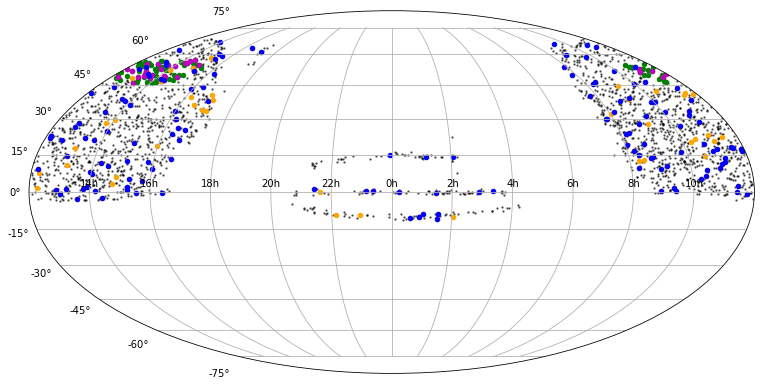

In [12]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords.ra.wrap_at(180*u.degree).radian, coords.dec.radian, c="k", s=2, alpha=0.5)
ax.scatter(coords.ra.wrap_at(180*u.degree).radian[lofar], coords.dec.radian[lofar], c="g", s=20)
ax.scatter(coords.ra.wrap_at(180*u.degree).radian[lofar_det], coords.dec.radian[lofar_det], c="m", s=20)
ax.scatter(coords.ra.wrap_at(180*u.degree).radian[first], coords.dec.radian[first], c="orange", s=20)
ax.scatter(coords.ra.wrap_at(180*u.degree).radian[vlass], coords.dec.radian[vlass], c="b", s=20)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
plt.grid(True)

Want a long strip of RA to get volume-complete sample. See how many are in cuts of 2 degrees.

In [13]:
ra, dec

(array([216.28807 , 148.705764, 189.102655, ..., 208.866585, 123.555496,
        116.050221]),
 array([-2.454726, 37.442858, 21.206803, ...,  1.924316, 16.709215,
        29.985228]))

In [14]:
dec.min(), dec.max()

(-11.138894, 68.339545)

(array([ 58.,  20., 165., 128., 131., 159., 183., 147., 141., 186., 142.,
        132., 130., 100.,  89.,  73.,  80.,  67.,  53.,  32.]),
 array([-11.138894  ,  -7.16497205,  -3.1910501 ,   0.78287185,
          4.7567938 ,   8.73071575,  12.7046377 ,  16.67855965,
         20.6524816 ,  24.62640355,  28.6003255 ,  32.57424745,
         36.5481694 ,  40.52209135,  44.4960133 ,  48.46993525,
         52.4438572 ,  56.41777915,  60.3917011 ,  64.36562305,
         68.339545  ]),
 <BarContainer object of 20 artists>)

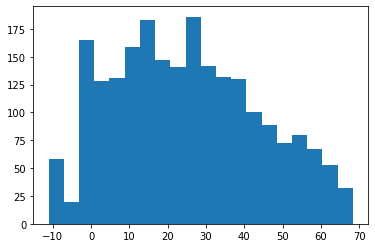

In [15]:
plt.hist(dec, bins=20)

In [16]:
dphi = 5
for i in np.arange(-17, 70, dphi):
    dmask = ((dec>i) & (dec<(i+dphi)))
    print("%3d < Dec < %3d: %4d, %3d LoTSS sources, %3d radio-detected" % (i, i+dphi, dmask.sum(), lofar[dmask].sum(), (lofar_det|first|vlass)[dmask].sum()))

-17 < Dec < -12:    0,   0 LoTSS sources,   0 radio-detected
-12 < Dec <  -7:   59,   0 LoTSS sources,   8 radio-detected
 -7 < Dec <  -2:   41,   0 LoTSS sources,   2 radio-detected
 -2 < Dec <   3:  219,   0 LoTSS sources,  25 radio-detected
  3 < Dec <   8:  164,   0 LoTSS sources,   8 radio-detected
  8 < Dec <  13:  192,   0 LoTSS sources,  17 radio-detected
 13 < Dec <  18:  225,   0 LoTSS sources,  18 radio-detected
 18 < Dec <  23:  176,   0 LoTSS sources,  17 radio-detected
 23 < Dec <  28:  208,   0 LoTSS sources,  11 radio-detected
 28 < Dec <  33:  197,   0 LoTSS sources,  13 radio-detected
 33 < Dec <  38:  146,   0 LoTSS sources,  11 radio-detected
 38 < Dec <  43:  167,   0 LoTSS sources,  14 radio-detected
 43 < Dec <  48:  108,  18 LoTSS sources,  13 radio-detected
 48 < Dec <  53:   93,  48 LoTSS sources,  27 radio-detected
 53 < Dec <  58:   94,  36 LoTSS sources,  16 radio-detected
 58 < Dec <  63:   78,   0 LoTSS sources,   7 radio-detected
 63 < Dec <  68:   46,  

Let's go with $ 48 < \delta < 53$.  That gives us a statistically meaningful volume-limited sample with size N=93, 48 of which are in the LoTSS-DR1 footprint.  27 are also detected in the radio, so for those we can make sure we're not wasting any observing time. 

In [17]:
decmask = ((dec>48)&(dec<53))
sample  = dat[decmask]

In [18]:
sample

col1                     Name      RA_1_1    Dec_1_1  \
68    2549  SDSSJ151133.07+513500.0  227.887798  51.583340   
83    7468  SDSSJ161601.73+495634.4  244.007218  49.942899   
114   4808  SDSSJ074729.63+492022.7  116.873492  49.339646   
154   3012  SDSSJ145844.83+492439.7  224.686796  49.411041   
164   1604  SDSSJ152222.02+524743.9  230.591760  52.795547   
...    ...                      ...         ...        ...   
8252  2228  SDSSJ120554.84+494236.3  181.478533  49.710092   
8253  2229  SDSSJ120034.49+510730.8  180.143728  51.125234   
8260  2226  SDSSJ115729.71+495940.3  179.373821  49.994545   
8263  2230  SDSSJ121420.28+484743.5  183.584513  48.795432   
8312  1939  SDSSJ095414.76+513304.4  148.561530  51.551232   

               SDSS_NAME        RA_2      DEC_2  REDSHIFT  TARGET_FLAG_TARGET  \
68    151133.07+513500.0  227.887802  51.583340    1.6654                11.0   
83    161601.73+495634.4  244.007217  49.942898    1.7226                11.0   
114   074729.63+492022.7  116.873489  49.339645    1.7133                10.0   
154   145844.83+492439.7  224.686798  49.411041    1.7134           1048579.0   
164   152222.02+524743.9  230.591766  52.795547    1.6942           1048579.0   
...                  ...         ...        ...       ...                 ...   
8252  120554.84+494236.3  181.478531  49.710091    1.6660           1048578.0   
8253  120034.49+510730.8  180.143723  51.125233    1.6897           1048579.0   
8260  115729.71+495940.3  179.373825  49.994545    1.7004                 2.0   
8263  121420.28+484743.5  183.584518  48.795433    1.7312                 3.0   
8312  095414.76+513304.4  148.561523  51.551231    1.7014           3145739.0   

      UNIFORM_TARGET  ...  e_Sint  Separation_1a          RA        DEC  \
68               1.0  ...     0.1            0.0  227.888009  51.583418   
83               1.0  ...     NaN            NaN  244.007271  49.942874   
114              1.0  ...     NaN            NaN  116.873560  49.339641   
154              1.0  ...     NaN            0.0         NaN        NaN   
164              1.0  ...     NaN            0.0         NaN        NaN   
...              ...  ...     ...            ...         ...        ...   
8252             1.0  ...     NaN            0.0         NaN        NaN   
8253             1.0  ...     NaN            0.0         NaN        NaN   
8260             1.0  ...     0.1            0.0         NaN        NaN   
8263             1.0  ...     0.1            0.0         NaN        NaN   
8312             1.0  ...     NaN            NaN  148.561579  51.551220   

      Total_flux  E_Total_flux  Peak_flux  E_Peak_flux  P_sidelobe  Separation  
68      1.129133      0.249713   0.909267     0.118224        -1.0    0.549284  
83     10.008052      0.206328   9.566796     0.115216        -1.0    0.152861  
114    62.169323      0.241196  60.946381     0.136497        -1.0    0.159818  
154          NaN           NaN        NaN          NaN         NaN         NaN  
164          NaN           NaN        NaN          NaN         NaN         NaN  
...          ...           ...        ...          ...         ...         ...  
8252         NaN           NaN        NaN          NaN         NaN         NaN  
8253         NaN           NaN        NaN          NaN         NaN         NaN  
8260         NaN           NaN        NaN          NaN         NaN         NaN  
8263         NaN           NaN        NaN          NaN         NaN         NaN  
8312    6.812805      0.221996   6.445650     0.120504        -1.0    0.118278  

[93 rows x 36 columns]

In [19]:
sample.to_csv("proposals/RLF/grdr7_Shen2011_8403col_lofar_first_vlass_48dec53.csv")

4 of these are from the original Richards+21 VLA sample:
- 081656.84+492438.1, 26uJy upper limit
- 095648.48+534713.5, 36uJy upper limit
- 101946.98+494848.6, ~2.5mJy FIRST source (should still ask for time to get 3GHz)
- 144510.01+524538.7, 55uJy detection in 2018b

So that leaves 92 sources we need to ask time for.  Collect the radio data we have and see how much time that'd add up to.

In [20]:
lofar    = ~isNaN(sample["r_z"].values) 
lofar_det= ~isNaN(sample["Speak"].values)
first    = sample["FINT_REST6CM_MJY_OBS"].values > 0
vlass    = ~isNaN(sample["Total_flux"].values)

In [21]:
#all in uJy
flux_lofar = sample["Speak"].values
flux_first = sample["FINT_REST6CM_MJY_OBS"].values
flux_vlass = sample["Total_flux"].values

In [22]:
print("LoTSS footprint : %d" % lofar.sum())
print("LoTSS detections: %d(%d)" % (lofar_det.sum(), ((lofar_det)&(~first)&(~vlass)).sum()))
print("FIRST detections: %d(%d)" % (first.sum(), ((~lofar_det)&(first)&(~vlass)).sum()))
print("VLASS detections: %d(%d)" % (vlass.sum(), ((~lofar_det)&(~first)&(vlass)).sum()))

LoTSS footprint : 48
LoTSS detections: 20(17)
FIRST detections: 10(2)
VLASS detections: 7(0)


(array([2., 1., 0., 1., 0., 0., 0., 1., 0., 2.]),
 array([ 1.12913259,  9.70687995, 18.28462731, 26.86237467, 35.44012203,
        44.01786939, 52.59561675, 61.1733641 , 69.75111146, 78.32885882,
        86.90660618]),
 <BarContainer object of 10 artists>)

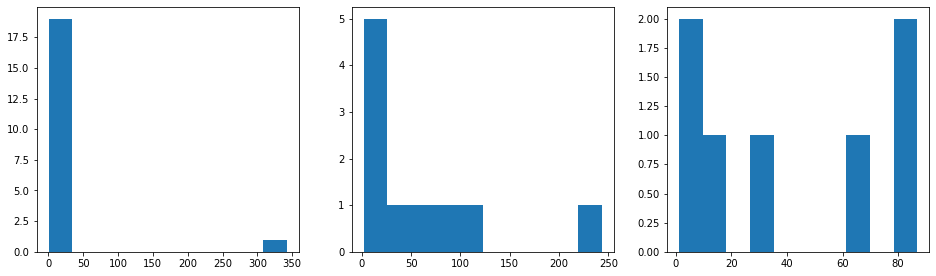

In [23]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(16,4.5))
ax1.hist(sample["Speak"].values)
ax2.hist(sample["FINT_REST6CM_MJY_OBS"].values[first])
ax3.hist(sample["Total_flux"].values)

all flux densities in mJy

In [24]:
src_times = np.zeros(sample.shape[0])

In [25]:
sample["Speak"].values[lofar_det].sort()

These are some rough cutoffs we can use in determining observing times:

- 9uJy requires a total of ~24min
- 10uJy requires a total of ~20min
- 12uJy requires a total of ~13min
- 15uJy requires a total of ~8min
- 20uJy requires a total of ~4.5min
- 40uJy requires a total of ~1min

In [27]:
def flux3ghz(nu, f):
    #convert f at nu to f at 3GHz assuming alpha=-0.7
    return f*((3/nu)**(-0.7))

def obs_time(flux):
    #flux units in uJy
    if flux/5 > 40:
        return 1
    elif flux/5 > 20:
        return 4.5
    elif flux/5 > 15:
        return 8
    elif flux/5 > 12:
        return 13
    elif flux/5 > 10:
        return 20
    elif flux/5 > 9:
        return 24
    return 0

1e3*flux3ghz(.144, 0.4)

47.74510551913738

In [28]:
for i in range(sample.shape[0]):
    if vlass[i]:
        f3i = 1e3*1.12*flux_vlass[i] #vlass1.1/2 flux systematically low by 15/8%
        src_times[i] = obs_time(f3i)
        #detected in vlass, apply flux correction and assign observing time
    elif first[i]:
        f3i = 1e3*flux3ghz(1.4, flux_first[i])
        src_times[i] = obs_time(f3i)
        #detected in first, compute 3GHz flux assuming alpha=-0.7 and assign observing time
    elif lofar_det[i]:
        f3i = 1e3*flux3ghz(.144, flux_lofar[i])
        src_times[i] = obs_time(f3i)
        #detected in lofar, compute 3GHz flux assuming alpha=-0.7 and assign observing time

In [29]:
src_times.sum() / 60

3.8

In [30]:
(src_times==0).sum()

66

Now 66 sources left.

I'm not totally sure how this works, but Amy says we can observe for a given amount of time to start, then if we don't achieve a detection we can continue going deeper.

If we do that, then ~20 minutes will get us about to the depth we achieved last time.  So, exposing for 20 minutes, we might expect a similar number of sources to be detected ($44\pm9\%$) as were in the previous VLA campaign.

65*0.44 = 28.6.

So if we go to about 10uJy for the remaining 65, we might expect to detect 28 of them, which leaves 37 we must go deeper for.

28*20min = 560min = 9.33 hours.

The last 37 we don't have a great handle on.  It may make sense to go as deep as we think may be necessary to detect the lowest levels of SF present.  Taking the number from the 2021A proposal, we get 3.65uJy depth, which requires ~ 4 hours.... 148 hours total.  But we can still get ~ 10x below the RLF with 4.3uJy (~ 2.15 hours), which would be ~ 80 more hours. Can go 8x below RLF knee, need 5.3uJy (~ 1.25 hours), so  46.25 hours.

So we would need roughly 4 + 10 + 80 = 94 total hours to achieve this to the level we really want.  Or 4+10+46.25 = 60.25 hours, probably more reasonable.

Not sure that's a reasonable time to ask for, but that's what we need to achieve the science goal with this sample.  Could maybe trim sample size a bit, but don't really want to do that.